# Preparing data

In [33]:
#Importo librerias
import pandas as pd
import numpy as np
from cleaner import categorical_to_numeric
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.datasets import make_blobs
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators import H2ORandomForestEstimator
import h2o
from sklearn.experimental import enable_hist_gradient_boosting
import scipy
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import StratifiedShuffleSplit

### Training dataset 

In [171]:
#Loading CSV
data = pd.read_csv("Input/diamonds_train.csv")

In [172]:
#Cheking what data contains
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [173]:
data.shape

(40345, 11)

In [174]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [175]:
#I did this for each column in order to get some info about what that column means
data.clarity.sort_values().unique()

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)

In [176]:
# I am going to change cut, color and clarity from object (categoric) to numerics
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [177]:
#Imported function from cleaner.py file 
categorical_to_numeric(data)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,4,3,4,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,3,7,6,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,5,5,5,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,4,3,8,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,2,4,3,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,1.55,5,3,4,61.3,61.0,7.46,7.39,4.55,11708
40341,40341,0.36,4,7,3,60.6,56.0,4.58,4.63,2.79,619
40342,40342,0.57,3,2,4,62.2,55.0,5.33,5.34,3.32,1267
40343,40343,1.01,3,5,8,59.6,62.0,6.47,6.56,3.88,9965


In [178]:
#No nulls, that sounds good.
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

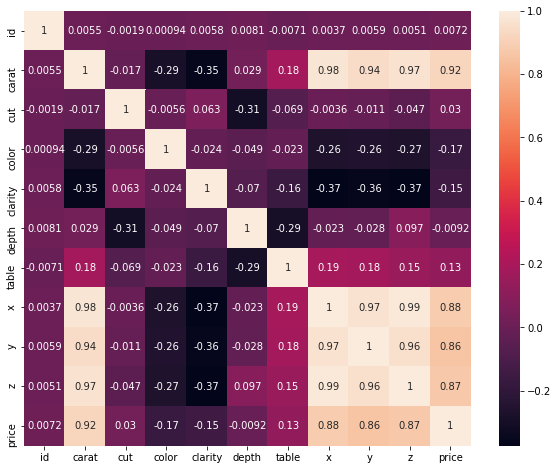

In [179]:
#Correlation

corr=data.corr()

#Graph
plt.figure (figsize = (10,8));
sns.heatmap(corr, annot=True);

Well, we can see that x, y , z and carat are highly correlated. It makes sense because all of them give information about diamond´s dimensions. I am not going to include x, y , and z but carat on my training because it is a relation between those three and is the one which´s more correlated with price.

In [180]:
#Searching for outliers. x, y and z have 0 values that I will remove.
data.describe()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.795652,3.760986,4.413236,4.058025,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,11646.742642,0.470806,1.026616,1.695243,1.648637,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20172.000000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,30258.000000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,40344.000000,4.010000,5.000000,7.000000,8.000000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [181]:
# Removing outliers
data = data[data.x != 0]
data = data[data.y != 0]
data = data[data.z != 0]

### Test dataset

In [158]:
data_test = pd.read_csv('./input/diamonds_test.csv')
data_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [159]:
#Imported function from cleaner.py file 
categorical_to_numeric(data_test)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,4,3,2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,4,7,8,62.1,57.0,4.52,4.46,2.79
2,2,1.57,3,2,4,60.3,58.0,7.58,7.55,4.56
3,3,0.31,4,3,4,61.8,57.0,4.32,4.36,2.68
4,4,1.51,2,2,7,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...,...
13444,13444,1.05,4,5,2,60.3,55.0,6.55,6.68,3.99
13445,13445,0.27,3,4,5,61.9,56.0,4.13,4.16,2.56
13446,13446,1.50,5,7,4,61.8,60.0,7.30,7.37,4.53
13447,13447,1.70,5,5,2,60.2,61.0,7.79,7.68,4.66


In [182]:
data_test = data_test[["carat", "cut", "color", "clarity", "depth", "table","x","y","z"]]

# Training

In [184]:

X = data[["carat", "cut", "color", "clarity", "depth", "table","x","y","z"]]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

In [185]:
#Standardization
sc = StandardScaler()
X = sc.fit_transform(X)

# First model -->RidgeRegression


Spoiler: discarded

In [17]:
#Training

model_rr = Ridge()
model_rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
#Prediction with the other 0.2 
y_pred = model_rr.predict(X_test)

In [19]:
#Prediction with test_dataset
y_pred_rr = model_rr.predict(data_test)
y_pred_rr = pd.DataFrame(y_pred_rr)

In [20]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 1255.6919018442977


# Second model -->SVR (linear)


Spoiler: discarded

In [67]:
#Training
model_svr = SVR(kernel="linear")
model_svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
#Prediction with the other 0.2 
y_pred = model_svr.predict(X_test)

In [69]:
#Prediction with test_dataset
y_pred_svr = model_svr.predict(data_test)
y_pred_svr = pd.DataFrame(y_pred_svr)

In [71]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 1950.3604564434531


# Third model -->BaggingClassifier


Spoiler: discarded

In [17]:
#Training
model_bc = BaggingClassifier()
model_bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [18]:
#Prediction with the other 0.2 
y_pred = model_bc.predict(X_test)

In [19]:
#Prediction with test_dataset
y_pred_bc = model_bc.predict(data_test)
y_pred_bc = pd.DataFrame(y_pred_bc)

In [20]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 1060.6265794840067


### Fourth model -->RandomForestRegressor

👍

In [84]:
#Training

model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
#Prediction with the other 0.2 
y_pred = model_rf.predict(X_test)

In [86]:
#Prediction with test_dataset
y_pred_total = model_rf.predict(data_test)
y_pred_total = pd.DataFrame(y_pred_total)


In [87]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
#y_pred_total.to_csv("rf.csv", index=False) Export as a CSV in orden to upload it to Kaagle


RMSE 582.5325807761266


### Fourth model -->ExtreTressClassifier()

Can't train the model neither here or google colab

In [ ]:
#Training

model_etc = ExtraTreesClassifier()
model_etc.fit(X_train,y_train)

### Fourth(bis) model -->AdaBoostRegressor

In [21]:
#Training

model_abc = AdaBoostRegressor(n_estimators=100)
model_abc.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [22]:
#Prediction with the other 0.2 
y_pred = model_abc.predict(X_test)

In [23]:
#Prediction with test_dataset
y_pred_abc = model_abc.predict(data_test)
y_pred_abc = pd.DataFrame(y_pred_abc)

In [24]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE 1354.5301459034217


### Fifth model -->GradientBoostingRegressor

Not bad, but not enough 

In [72]:
#Training

model_gbr = GradientBoostingRegressor(n_estimators=100)
model_gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
#Prediction with the other 0.2 
y_pred = model_gbr.predict(X_test)

In [57]:
#Prediction with test_dataset
y_pred_gbr = model_gbr.predict(data_test)
y_pred_gbr = pd.DataFrame(y_pred_gbr)

In [58]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 630.9318717776733


In [70]:
#y_pred_gbr.to_csv("gbr.csv", index=False) #Export as a CSV in orden to upload it to Kaagle

### Sixth model -->DecisionTreeRegressor

Nah, discarded

In [75]:
#Training

model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
#Prediction with the other 0.2 
y_pred = model_dtr.predict(X_test)

In [77]:
#Prediction with test_dataset
y_pred_dtr = model_dtr.predict(data_test)
y_pred_dtr = pd.DataFrame(y_pred_dtr)

In [78]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 779.294546066854


### RandomForestRegressor (improving it 1)

In [227]:
#Training

model_rf = RandomForestRegressor(n_estimators = 100, min_samples_split= 10, min_samples_leaf=5, max_depth= 100 )
model_rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [228]:
#Prediction with the other 0.2 
y_pred = model_rf.predict(X_test)

In [229]:
#Prediction with test_dataset
y_pred_total = model_rf.predict(data_test)
y_pred_total = pd.DataFrame(y_pred_total)

In [230]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 554.1190493868021


In [200]:
#y_pred_total.insert(loc=0, column="id", value=data["id"])
#y_pred_total.rename(columns={0:"price"},inplace=True)
#y_pred_total


In [201]:
#y_pred_total.to_csv("rfjkdsahfl.csv", index=False) #Export as a CSV in orden to upload it to Kaagle

### RandomForestRegressor (improving it 2)

In [19]:
#Not really an improvement in the competition

from sklearn.model_selection import RandomizedSearchCV 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 51.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [21]:
rf_random.best_params_

{'n_estimators': 231,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [190]:
#Training

model_rf = RandomForestRegressor(n_estimators= 231,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_features= "auto",
 max_depth= 70,
 bootstrap= True)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=231, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [193]:
#Prediction with the other 0.2 
y_pred = model_rf.predict(X_test)

In [194]:
#Prediction with test_dataset
y_pred_total = model_rf.predict(data_test)
y_pred_total = pd.DataFrame(y_pred_total)

In [195]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 551.2388703079586


In [71]:
#y_pred_total.insert(loc=0, column='id', value=data["id"])
#y_pred_total.rename(columns={0:"price"},inplace=True)
#y_pred_total

In [72]:
y_pred_total.to_csv("rf_bestparameters2.csv", index=False) #Export as a CSV in orden to upload it to Kaagle